In [38]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns

import re
import spacy

In [39]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label
nlp = spacy.load("en")

In [40]:
def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d

# TODO: Use regular expressions to remove unwanted
# text and clean up our tweets to be more usable!

def clean_twitter(s):
    """ Cleans Twitter specific issues
    Should probably clean out mentions(@), URLs(https:), and RT's.
    """
    s = re.sub('RT @[\w]*:|RT @[\w]*=:', '', str(s)) # remove RT's
    s = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(s)) # remove mentions
    s = re.sub(r'http\S+', '', str(s)) # remove http links
    s = re.sub(r'[:;,.\'""!\s]',' ', str(s)) # remove special caracters
    doc = nlp(s) # using spacy
    s = ' '.join([token.lemma_ for token in doc]) #lemmatizing
    
    return s

In [41]:
X.map(clean_twitter)

0         here s CNN on Sharia law   -PRON- can be stone or have -PRON- hand cut off...
1         LOOK obama Clinton crony ILLEGALLY arm & amp   train muslim terrorist incl...
2         # ThrowbackThursday # BenGarrison # cartoon from 2013 # Obama get crown # ...
3                    Say   Islam be peace    or else    # trump # maga # isis # tcot   
4                                             all aboard the Trump Train   # ChooChoo 🚂
5         FLASHBACK & gt & gt   Judicial Watch Releases Huma Abedin Deposition testi...
6         follow FBI presser    say “ the system be rig "   & amp    weigh in # foxl...
7                                       trump    -PRON- re run Against a Rigged Press  
8         literally 98 % of Hillary supporter -PRON- see online be astroturfe spamme...
9                                                                           Islam      
10          PSYCHO - MOTHER Hillary at -PRON- most evil    # MAGA   # BasketOfDeplor...
11        the unthinkable have h

In [42]:
# Analyze syntax - Noun phrases
tweets = X.map(clean_twitter)
nlp = spacy.load("en")
doc = nlp(str(tweets))


#print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print([token.lemma_ for token in doc])

['0', '        ', 'here', 's', 'CNN', 'on', 'Sharia', 'law', '  ', '-pron-', 'can', 'be', 'stone', 'or', 'have', '-PRON-', 'hand', 'cut', 'off', '...', '\n', '1', '        ', 'LOOK', 'obama', 'Clinton', 'crony', 'ILLEGALLY', 'arm', '&', 'amp', '  ', 'train', 'muslim', 'terrorist', 'incl', '...', '\n', '2', '        ', '#', 'ThrowbackThursday', '#', 'BenGarrison', '#', 'cartoon', 'from', '2013', '#', 'Obama', 'get', 'crown', '#', '...', '\n', '3', '                   ', 'Say', '  ', 'Islam', 'be', 'peace', '   ', 'or', 'else', '   ', '#', 'trump', '#', 'maga', '#', 'isis', '#', 'tcot', '  \n', '4', '                                            ', 'all', 'aboard', 'the', 'Trump', 'Train', '  ', '#', 'ChooChoo', '🚂', '\n', '5', '        ', 'FLASHBACK', '&', 'gt', '&', 'gt', '  ', 'Judicial', 'Watch', 'Releases', 'Huma', 'Abedin', 'Deposition', 'testi', '...', '\n', '6', '        ', 'follow', 'FBI', 'presser', '   ', 'say', '“', 'the', 'system', 'be', 'rig', '"', '  ', '&', 'amp', '   ', 'w

In [43]:
# Analyze syntax - Verbs
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

Verbs: ['s', 'can', 'be', 'have', 'cut', 'obama', 'get', 'be', 'trump', 'follow', 'say', 'be', 'weigh', 're', 'run', 'see', 'be', 'maga', 'have', 'happen', 'pray', 'fall', 'lie', 'amp', 'wake', 'be', 'try', 'shoot', 'be', 'will', 'reopen', 'probe', 'be', '💕', 'admit', 'burn', 'be', 'be', 'be', 'be', 'be', 'hold', '-PRON-', 'collapse', 'isn', 'take', 'be', 'wear', 'compete', 'want', 'build', 's', 'billclintonisarapist', 'be', 'be', 'stop', 'allow', 'use', 'May', 'let', 'be', 'democratspartyofhate', 'need', 'année', 'break', 'be', '-pron-', 'be', 'MUST', 'watch', 'bleus', 'keep', 'could', 'nominate', 'try', 'find', '-pron-', 'allow', 'give', 'pay', 'need', 'need', 'be', 'offend', 'by-', 'change', 'join', 'form', 'love', 'enter', 'edouard', 'réussi', 'be', 'do', 'inbreedingandbrainwashe']


In [44]:
# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.label_)

CARDINAL
ORG
LANGUAGE
CARDINAL
PERSON
CARDINAL
MONEY
DATE
CARDINAL
CARDINAL
MONEY
MONEY
CARDINAL
CARDINAL
ORG
ORG
PERSON
CARDINAL
ORG
MONEY
CARDINAL
ORG
PERCENT
PERSON
CARDINAL
EVENT
PERSON
CARDINAL
ORG
MONEY
CARDINAL
GPE
CARDINAL
CARDINAL
ORG
PERSON
CARDINAL
CARDINAL
MONEY
ORG
PERSON
CARDINAL
PERSON
GPE
CARDINAL
CARDINAL
ORG
PERSON
CARDINAL
PERSON
PERSON
CARDINAL
PERSON
PERSON
DATE
ORG
MONEY
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
ORG
CARDINAL
CARDINAL
PERSON
ORG
CARDINAL
GPE
CARDINAL
NORP
CARDINAL
CARDINAL
ORG
CARDINAL
CARDINAL
PERSON
NORP
DATE
PERSON
DATE
PERSON
GPE
ORG
DATE
DATE
PERSON
CARDINAL
GPE
GPE
DATE
CARDINAL
CARDINAL
DATE
DATE
ORG
CARDINAL
CARDINAL
CARDINAL
CARDINAL
DATE
PERSON
PERSON
DATE
PERSON
CARDINAL
PERSON
DATE
PERSON
ORG
ORG
DATE
DATE
CARDINAL
MONEY
PERSON
CARDINAL
DATE
DATE
PERSON
PERSON
CARDINAL
NORP
ORG
CARDINAL
FAC
DATE
ORG
DATE
DATE
DATE
MONEY
DATE
CARDINAL
PERSON
ORG
DATE
MONEY
CARDINAL


In [45]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

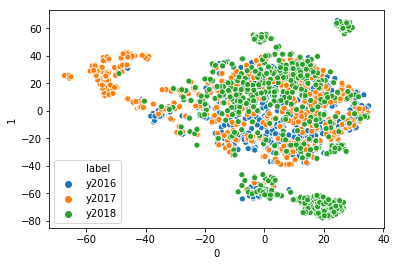

In [46]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

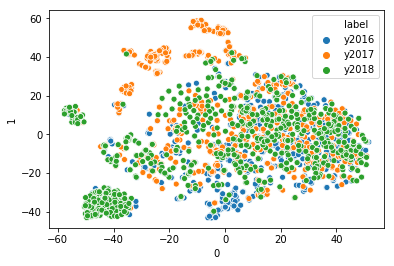

In [47]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

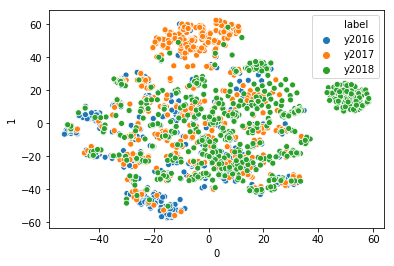

In [48]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 

vectorizer = TfidfVectorizer(preprocessor = clean_twitter, stop_words='english')
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)